In [2]:
import pandas as pd
import os

## Corpus from Europresse

In [2]:
#rename the columns, delete the raws with empty content 
corpus_ep = pd.read_csv('corpora/europresse/corpus_europresse.csv', encoding = "UTF-8")
corpus_ep.columns = ['Content','Author','Journal','Title','Time Steps','Date','ID']
corpus_ep = corpus_ep[['Date','Journal','Author','Title','Content']]
corpus_ep = corpus_ep[corpus_ep['Content'].notnull()]
corpus_ep

,Date,Journal,Author,Title,Content
44,2021-05-15,"La-Croix,-no.-42011",NaN,En-aparté,Leurs inspirations Le Corbusier et Jacques...
45,2021-02-03,"La-Croix,-no.-41926",NaN,Les-essentiels-Culture,Lieux culturels Plaidoyer pour la réouverture ...
46,2017-06-01,"Revista-Estúdio,-Artistas-Sobre-Outras-Obras,-...",NaN,Constructions-and-performances:-Alicia-Framis-...,The article proposes the incorporation of the ...
47,2021-03-29,Web-sites---Construction-&-Real-Estate---Arch-...,NaN,Mulheres-Na-Arquitetura-|-Tag-|-ArchDaily-Brasil,Alvar Aalto e Elissa Aalto em 1956. Via Wikime...
48,2021-02-16,Web-sites---Construction-&-Real-Estate---Arch-...,NaN,Anne-Lacaton-|-Tag-|-ArchDaily-Brasil,"Anne Lacaton and Jean-Philippe Vassal, 2021 Pr..."
...,...,...,...,...,...
14100,2019-11-29,Le-Figaro-(site-web),"Jamgotchian,-Émilie","Fête-des-lanternes,-Johnny-Hallyday:-les-sorti...",● 100 % musique. La Philharmonie (19e) met à ...
14101,2017-05-06,Le-Figaro.fr,"Pagesy,-Hélène,-Daudré,-Brune",Présidentielle-:-nous-avons-compilé-les-moment...,● François Hollande annonce qu'il ne sera pas ...
14102,2017-12-01,Le-Figaro.fr,"Hanoun,-Lisa","Salon-nautique,--Palais--de--Tokyo,-Nocturnes-...","● Salon nautique. Comme chaque année, la Port..."
14103,2016-10-01,Le-Figaro.fr,"Bouleau,-Marie-Sarah,-Duponchelle,-Valérie","À-Paris-ce-week-end:-Nuit-Blanche,-Publivores,...",● Une Nuit Blanche avec Anish Kapoor. Pour ce...


### detect the language of centent

In [3]:
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [ ]:
langue_ep = []
for i in corpus_ep['Content']:
    try:
        lan = detect(str(i))
    except:
        lang='no'
        print(str(i),'has no content')
    langue_ep.append(lan)

2014041417 : 15 : 11 has no content


In [ ]:
corpus_ep['Language'] = langue_ep
corpus_ep

## Corpus from Factiva

In [10]:
corpus_ft = pd.read_csv('corpora/factiva/corpus_factiva.csv', encoding = "UTF-8")
corpus_ft.columns= ['Journal','Langue','Author','Title','Date','Content','Region']
corpus_ft = corpus_ft[['Date','Journal','Author','Title','Content','Langue','Region']]
corpus_ft = corpus_ft[corpus_ft['Content'].notnull()]
corpus_ft

,Date,Journal,Author,Title,Content,Langue,Region
0,1 août 2007,Reed Business Information (US),Staff,"Sheraton, Le Méridien Evolve Under Starwood","The 35-year-old Le Méridien brand, passed amon...",Anglais,United States *** North AmericaIPCHTLS080107
2,1 août 2008 ET 12:27,Agence France-Presse,NaN,Courrier des arts et du patrimoine,"L'achat de l'oeuvre, d’un coût de 1,65 million...",Français,France *** European Union Countries *** Europe...
3,1 août 2010,Consorcio Interamericano de Comunicación SA de CV,Jesús Pacheco,Entrevista / Richard Kern / Kern abreviado,Una de sus primeras incursiones en el arte fue...,Espagnol,New York *** United States *** North America *...
4,1 août 2012,Gale Group Inc.,"Sessa, Andrew",Choose your own adventure: supersize your trav...,NEW YORK CITY Aire Ancient Baths Channel your ...,Anglais,France *** Italy *** Japan *** New York *** Pa...
5,1 août 2013,Axel Springer AG,Susanne Mayer,Ausstellung Little Black Dress; Einfach nur sc...,Michelle Obama. Elizabeth Hurley. Jackie Kenne...,Allemand,United States *** North America
...,...,...,...,...,...,...,...
14184,Annahar PD 19 avril 2018,Document ANHR000020180419ee4j0008p PUB BUSINES...,NaN,84 mots HD L'Observatoire de la ville se pench...,fra : France | eecz : European Union Countries...,"© 2018, Annahar, All rights Reserved - Provide...",France *** European Union Countries *** Europe...
14185,Annahar PD 19 juillet 2018 ET 12:21,Document ANHR000020180719ee7j00005 PUB Société...,"187 mots BY Sophie Béguerie, Isabelle Blondel,...",فاديا خزام الصليبي HD Cinq afterworks entre co...,"لايف ستايل TD Dans la bonne humeur, embarquez ...","© 2018, Annahar, All rights Reserved - Provide...",France *** Paris *** Ile-de-France *** Europea...
14186,Annahar PD 2 juillet 2019,Document ANHR000020190702ef72000pd PUB Sebdo L...,267 mots,"فاديا خزام الصليبي HD Michel Houellebecq, un h...",gart : Art | gfasw : Fashion Shows/Events | gc...,"© 2019, Annahar, All rights Reserved - Provide...",France *** Ile-de-France *** Europe *** Europe...
14187,Annahar PD 23 janvier 2019,Document ANHR000020190123ef1n000ji PUB Les Echos,266 mots BY GILLES DENIS,فاديا خزام الصليبي HD Fashion Week Haute Coutu...,gfas : Fashion | gfasw : Fashion Shows/Events ...,"© 2019, Annahar, All rights Reserved - Provide...",France *** Ile-de-France *** European Union Co...


In [11]:
langue_ft = []
for i in corpus_ft['Content']:
    try:
        lan = detect(str(i))
    except:
        lang='no'
        print('(', str(i),') has no content')
    langue_ft.append(lan)

( marcus.rubin@pol.dk ) has no content
( 24:51 24:59 8166754 2015-11-10 12:35:05 ) has no content


In [12]:
langue_ft
corpus_ft['Language'] = langue_ft
corpus_ft

,Date,Journal,Author,Title,Content,Langue,Region,Language
0,1 août 2007,Reed Business Information (US),Staff,"Sheraton, Le Méridien Evolve Under Starwood","The 35-year-old Le Méridien brand, passed amon...",Anglais,United States *** North AmericaIPCHTLS080107,en
2,1 août 2008 ET 12:27,Agence France-Presse,NaN,Courrier des arts et du patrimoine,"L'achat de l'oeuvre, d’un coût de 1,65 million...",Français,France *** European Union Countries *** Europe...,fr
3,1 août 2010,Consorcio Interamericano de Comunicación SA de CV,Jesús Pacheco,Entrevista / Richard Kern / Kern abreviado,Una de sus primeras incursiones en el arte fue...,Espagnol,New York *** United States *** North America *...,es
4,1 août 2012,Gale Group Inc.,"Sessa, Andrew",Choose your own adventure: supersize your trav...,NEW YORK CITY Aire Ancient Baths Channel your ...,Anglais,France *** Italy *** Japan *** New York *** Pa...,en
5,1 août 2013,Axel Springer AG,Susanne Mayer,Ausstellung Little Black Dress; Einfach nur sc...,Michelle Obama. Elizabeth Hurley. Jackie Kenne...,Allemand,United States *** North America,de
...,...,...,...,...,...,...,...,...
14184,Annahar PD 19 avril 2018,Document ANHR000020180419ee4j0008p PUB BUSINES...,NaN,84 mots HD L'Observatoire de la ville se pench...,fra : France | eecz : European Union Countries...,"© 2018, Annahar, All rights Reserved - Provide...",France *** European Union Countries *** Europe...,fr
14185,Annahar PD 19 juillet 2018 ET 12:21,Document ANHR000020180719ee7j00005 PUB Société...,"187 mots BY Sophie Béguerie, Isabelle Blondel,...",فاديا خزام الصليبي HD Cinq afterworks entre co...,"لايف ستايل TD Dans la bonne humeur, embarquez ...","© 2018, Annahar, All rights Reserved - Provide...",France *** Paris *** Ile-de-France *** Europea...,fr
14186,Annahar PD 2 juillet 2019,Document ANHR000020190702ef72000pd PUB Sebdo L...,267 mots,"فاديا خزام الصليبي HD Michel Houellebecq, un h...",gart : Art | gfasw : Fashion Shows/Events | gc...,"© 2019, Annahar, All rights Reserved - Provide...",France *** Ile-de-France *** Europe *** Europe...,fr
14187,Annahar PD 23 janvier 2019,Document ANHR000020190123ef1n000ji PUB Les Echos,266 mots BY GILLES DENIS,فاديا خزام الصليبي HD Fashion Week Haute Coutu...,gfas : Fashion | gfasw : Fashion Shows/Events ...,"© 2019, Annahar, All rights Reserved - Provide...",France *** Ile-de-France *** European Union Co...,fr


In [13]:
import dateparser
import re

dat = []
for date_string in corpus_ft['Date']:
    try:
        date = dateparser.parse(date_string).date()
        print(date)
    except:
        date = re.findall('[0-9]* [a-zé]* [0-9]*', date_string)
        date = dateparser.parse(str(date)).date()
        print(date)
    dat.append(date)

2007-08-01
2008-08-01
2010-08-01
2012-08-01
2013-08-01
2013-08-01
2015-08-01
2015-08-01
2017-08-01
2017-08-01
2017-08-01
2018-08-01
2019-08-01
2019-08-01
2019-08-01
2020-08-01
2000-04-01
2001-04-01
2001-04-01
2005-04-01
2005-04-01
2005-04-01
2005-04-01
2005-04-01
2006-04-01
2006-04-01
2006-04-01
2006-04-01
2006-04-01
2007-04-01
2007-04-01
2008-04-01
2008-04-01
2008-04-01
2009-04-01
2009-04-01
2010-04-01
2010-04-01
2010-04-01
2010-04-01
2011-04-01
2011-04-01
2011-04-01
2011-04-01
2012-04-01
2012-04-01
2013-04-01
2014-04-01
2014-04-01
2014-04-01
2014-04-01
2015-04-01
2015-04-01
2015-04-01
2015-04-01
2016-04-01
2016-04-01
2016-04-01
2016-04-01
2016-04-01
2016-04-01
2017-04-01
2017-04-01
2017-04-01
2017-04-01
2018-04-01
2018-04-01
2018-04-01
2018-04-01
2019-04-01
2019-04-01
2019-04-01
2021-04-01
2005-12-01
2005-12-01
2006-12-01
2006-12-01
2006-12-01
2007-12-01
2008-12-01
2008-12-01
2008-12-01
2008-12-01
2009-12-01
2009-12-01
2010-12-01
2010-12-01
2010-12-01
2011-12-01
2012-12-01
2013-12-01

2017-05-10
2018-05-10
2018-05-10
2018-05-10
2019-05-10
2019-05-10
2019-05-10
2019-05-10
2019-05-10
2019-05-10
2020-05-10
2021-05-10
2002-03-10
2002-03-10
2005-03-10
2006-03-10
2007-03-10
2007-03-10
2009-03-10
2009-03-10
2009-03-10
2010-03-10
2010-03-10
2011-03-10
2011-03-10
2011-03-10
2011-03-10
2011-03-10
2011-03-10
2012-03-10
2012-03-10
2014-03-10
2014-03-10
2014-03-10
2015-03-10
2015-03-10
2015-03-10
2015-03-10
2015-03-10
2015-03-10
2015-03-10
2015-03-10
2016-03-10
2016-03-10
2016-03-10
2016-03-10
2016-03-10
2016-03-10
2016-03-10
2016-03-10
2017-03-10
2017-03-10
2017-03-10
2017-03-10
2019-03-10
2020-03-10
2020-03-10
2021-03-10
2021-03-10
2002-11-10
2005-11-10
2006-11-10
2007-11-10
2007-11-10
2008-11-10
2008-11-10
2009-11-10
2010-11-10
2011-11-10
2012-11-10
2012-11-10
2013-11-10
2013-11-10
2014-11-10
2015-11-10
2015-11-10
2015-11-10
2016-11-10
2016-11-10
2017-11-10
2019-11-10
2020-11-10
2020-11-10
2003-10-10
2003-10-10
2003-10-10
2003-10-10
2003-10-10
2003-10-10
2003-10-10
2003-10-10

2016-07-12
2016-07-12
2017-07-12
2017-07-12
2018-07-12
2018-07-12
2018-07-12
2019-07-12
2019-07-12
2020-07-12
2003-06-12
2004-06-12
2004-06-12
2005-06-12
2007-06-12
2007-06-12
2013-06-12
2013-06-12
2013-06-12
2014-06-12
2014-06-12
2014-06-12
2014-06-12
2014-06-12
2015-06-12
2015-06-12
2015-06-12
2015-06-12
2016-06-12
2016-06-12
2017-06-12
2017-06-12
2017-06-12
2018-06-12
2018-06-12
2018-06-12
2018-06-12
2021-06-12
2004-05-12
2005-05-12
2005-05-12
2005-05-12
2005-05-12
2005-05-12
2005-05-12
2006-05-12
2011-05-12
2011-05-12
2011-05-12
2012-05-12
2013-05-12
2013-05-12
2015-05-12
2015-05-12
2015-05-12
2015-05-12
2015-05-12
2015-05-12
2015-05-12
2015-05-12
2015-05-12
2016-05-12
2017-05-12
2017-05-12
2018-05-12
2018-05-12
2021-05-12
2004-03-12
2005-03-12
2005-03-12
2006-03-12
2008-03-12
2008-03-12
2009-03-12
2009-03-12
2011-03-12
2011-03-12
2012-03-12
2012-03-12
2013-03-12
2013-03-12
2013-03-12
2014-03-12
2014-03-12
2014-03-12
2015-03-12
2015-03-12
2015-03-12
2015-03-12
2015-03-12
2018-03-12

2019-02-14
2021-02-14
2005-01-14
2005-01-14
2006-01-14
2008-01-14
2008-01-14
2008-01-14
2010-01-14
2010-01-14
2010-01-14
2011-01-14
2011-01-14
2013-01-14
2014-01-14
2015-01-14
2015-01-14
2016-01-14
2016-01-14
2016-01-14
2016-01-14
2017-01-14
2017-01-14
2018-01-14
2019-01-14
2019-01-14
2019-01-14
2020-01-14
2020-01-14
2020-01-14
2005-07-14
2005-07-14
2006-07-14
2006-07-14
2007-07-14
2007-07-14
2008-07-14
2009-07-14
2012-07-14
2013-07-14
2015-07-14
2015-07-14
2016-07-14
2016-07-14
2017-07-14
2017-07-14
2018-07-14
2019-07-14
2019-07-14
2020-07-14
2005-06-14
2006-06-14
2006-06-14
2006-06-14
2007-06-14
2008-06-14
2010-06-14
2010-06-14
2011-06-14
2012-06-14
2013-06-14
2013-06-14
2013-06-14
2014-06-14
2014-06-14
2015-06-14
2015-06-14
2016-06-14
2016-06-14
2016-06-14
2017-06-14
2017-06-14
2017-06-14
2018-06-14
2018-06-14
2018-06-14
2018-06-14
2018-06-14
2020-06-14
2020-06-14
2002-05-14
2005-05-14
2007-05-14
2008-05-14
2009-05-14
2009-05-14
2010-05-14
2010-05-14
2010-05-14
2010-05-14
2010-05-14

2011-02-16
2011-02-16
2012-02-16
2013-02-16
2013-02-16
2015-02-16
2015-02-16
2015-02-16
2015-02-16
2016-02-16
2017-02-16
2017-02-16
2018-02-16
2019-02-16
2019-02-16
2021-02-16
2021-02-16
2021-02-16
2005-01-16
2006-01-16
2006-01-16
2008-01-16
2008-01-16
2009-01-16
2009-01-16
2009-01-16
2010-01-16
2013-01-16
2013-01-16
2013-01-16
2013-01-16
2014-01-16
2014-01-16
2014-01-16
2015-01-16
2018-01-16
2019-01-16
2019-01-16
2019-01-16
2020-01-16
2020-01-16
2020-01-16
2020-01-16
2003-07-16
2005-07-16
2009-07-16
2012-07-16
2013-07-16
2014-07-16
2015-07-16
2015-07-16
2016-07-16
2018-07-16
2019-07-16
2019-07-16
2020-07-16
2003-06-16
2005-06-16
2005-06-16
2005-06-16
2006-06-16
2009-06-16
2009-06-16
2009-06-16
2010-06-16
2010-06-16
2010-06-16
2010-06-16
2012-06-16
2012-06-16
2013-06-16
2014-06-16
2015-06-16
2015-06-16
2016-06-16
2016-06-16
2016-06-16
2016-06-16
2016-06-16
2017-06-16
2017-06-16
2018-06-16
2018-06-16
2018-06-16
2020-06-16
2020-06-16
2003-05-16
2004-05-16
2005-05-16
2006-05-16
2006-05-16

2019-12-18
2019-12-18
2020-12-18
2002-02-18
2004-02-18
2005-02-18
2005-02-18
2007-02-18
2007-02-18
2008-02-18
2009-02-18
2010-02-18
2011-02-18
2011-02-18
2012-02-18
2013-02-18
2013-02-18
2013-02-18
2014-02-18
2015-02-18
2015-02-18
2016-02-18
2016-02-18
2016-02-18
2016-02-18
2016-02-18
2017-02-18
2017-02-18
2017-02-18
2017-02-18
2018-02-18
2018-02-18
2020-02-18
2021-02-18
2021-02-18
2021-02-18
2002-01-18
2002-01-18
2002-01-18
2002-01-18
2002-01-18
2002-01-18
2003-01-18
2003-01-18
2006-01-18
2006-01-18
2008-01-18
2011-01-18
2012-01-18
2012-01-18
2013-01-18
2014-01-18
2014-01-18
2015-01-18
2016-01-18
2016-01-18
2016-01-18
2016-01-18
2016-01-18
2018-01-18
2018-01-18
2018-01-18
2018-01-18
2018-01-18
2018-01-18
2018-01-18
2018-01-18
2019-01-18
2019-01-18
2019-01-18
2019-01-18
2019-01-18
2019-01-18
2019-01-18
2019-01-18
2020-01-18
2020-01-18
2020-01-18
2020-01-18
2003-07-18
2006-07-18
2009-07-18
2009-07-18
2009-07-18
2012-07-18
2012-07-18
2013-07-18
2013-07-18
2014-07-18
2014-07-18
2014-07-18

2016-09-19
2016-09-19
2016-09-19
2017-09-19
2017-09-19
2017-09-19
2018-09-19
2018-09-19
2018-09-19
2019-09-19
2019-09-19
2019-09-19
2019-09-19
2019-09-19
2019-09-19
2019-09-19
2000-08-02
2008-08-02
2008-08-02
2010-08-02
2013-08-02
2016-08-02
2017-08-02
2019-08-02
2019-08-02
2003-04-02
2003-04-02
2007-04-02
2007-04-02
2007-04-02
2007-04-02
2008-04-02
2008-04-02
2009-04-02
2010-04-02
2010-04-02
2010-04-02
2011-04-02
2011-04-02
2011-04-02
2011-04-02
2011-04-02
2011-04-02
2011-04-02
2012-04-02
2012-04-02
2012-04-02
2013-04-02
2013-04-02
2014-04-02
2014-04-02
2014-04-02
2014-04-02
2014-04-02
2015-04-02
2015-04-02
2015-04-02
2016-04-02
2016-04-02
2017-04-02
2017-04-02
2017-04-02
2018-04-02
2018-04-02
2018-04-02
2019-04-02
2019-04-02
2019-04-02
2020-04-02
2021-04-02
2021-04-02
2021-04-02
2021-04-02
2021-04-02
2004-12-02
2004-12-02
2006-12-02
2008-12-02
2008-12-02
2008-12-02
2009-12-02
2009-12-02
2010-12-02
2010-12-02
2010-12-02
2013-12-02
2014-12-02
2014-12-02
2014-12-02
2014-12-02
2014-12-02

2015-03-20
2016-03-20
2018-03-20
2018-03-20
2018-03-20
2018-03-20
2018-03-20
2018-03-20
2018-03-20
2019-03-20
2019-03-20
2021-03-20
2021-03-20
2004-11-20
2005-11-20
2005-11-20
2005-11-20
2005-11-20
2005-11-20
2007-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2008-11-20
2009-11-20
2009-11-20
2009-11-20
2009-11-20
2009-11-20
2009-11-20
2010-11-20
2011-11-20
2011-11-20
2013-11-20
2013-11-20
2013-11-20
2015-11-20
2015-11-20
2015-11-20
2015-11-20
2015-11-20
2017-11-20
2018-11-20
2018-11-20
2018-11-20
2019-11-20
2019-11-20
2019-11-20
2019-11-20
2020-11-20
2005-10-20
2005-10-20
2007-10-20
2007-10-20
2008-10-20
2008-10-20
2010-10-20
2010-10-20
2010-10-20
2011-10-20
2011-10-20
2012-10-20
2012-10-20
2012-10-20
2014-10-20
2015-10-20
2015-10-20
2015-10-20
2016-10-20
2016-10-20
2016-10-20
2016-10-20
2016-10-20
2017-10-20
2017-10-20
2017-10-20
2017-10-20
2017-10-20
2017-10-20
2018-10-20
2018-10-20
2018-10-20
2018-10-20
2019-10-20
2019-10-20

2008-02-22
2010-02-22
2013-02-22
2013-02-22
2013-02-22
2013-02-22
2015-02-22
2015-02-22
2015-02-22
2015-02-22
2015-02-22
2015-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2017-02-22
2019-02-22
2020-02-22
2020-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2021-02-22
2001-01-22
2002-01-22
2002-01-22
2002-01-22
2002-01-22
2002-01-22
2004-01-22
2004-01-22
2005-01-22
2007-01-22
2009-01-22
2010-01-22
2010-01-22
2013-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2014-01-22
2015-01-22
2016-01-22
2016-01-22
2016-01-22
2016-01-22
2017-01-22
2017-01-22
2017-01-22
2018-01-22
2018-01-22
2018-01-22
2018-01-22
2018-01-22
2018-01-22
2019-01-22
2019-01-22
2019-01-22
2019-01-22

2014-10-23
2014-10-23
2014-10-23
2014-10-23
2015-10-23
2015-10-23
2015-10-23
2017-10-23
2017-10-23
2017-10-23
2017-10-23
2018-10-23
2018-10-23
2019-10-23
2020-10-23
2020-10-23
2004-09-23
2005-09-23
2005-09-23
2006-09-23
2008-09-23
2008-09-23
2008-09-23
2009-09-23
2010-09-23
2013-09-23
2013-09-23
2014-09-23
2014-09-23
2015-09-23
2015-09-23
2015-09-23
2015-09-23
2016-09-23
2016-09-23
2016-09-23
2016-09-23
2017-09-23
2017-09-23
2017-09-23
2018-09-23
2019-09-23
2019-09-23
2019-09-23
2005-08-24
2005-08-24
2006-08-24
2007-08-24
2008-08-24
2009-08-24
2012-08-24
2012-08-24
2013-08-24
2014-08-24
2015-08-24
2016-08-24
2016-08-24
2016-08-24
2018-08-24
2018-08-24
2019-08-24
2003-04-24
2008-04-24
2008-04-24
2008-04-24
2008-04-24
2009-04-24
2009-04-24
2010-04-24
2010-04-24
2010-04-24
2011-04-24
2012-04-24
2012-04-24
2013-04-24
2013-04-24
2014-04-24
2014-04-24
2014-04-24
2014-04-24
2015-04-24
2015-04-24
2015-04-24
2015-04-24
2015-04-24
2015-04-24
2015-04-24
2016-04-24
2016-04-24
2016-04-24
2016-04-24

2006-10-25
2007-10-25
2007-10-25
2007-10-25
2007-10-25
2007-10-25
2008-10-25
2010-10-25
2011-10-25
2011-10-25
2011-10-25
2011-10-25
2011-10-25
2011-10-25
2012-10-25
2012-10-25
2012-10-25
2012-10-25
2012-10-25
2013-10-25
2013-10-25
2013-10-25
2013-10-25
2013-10-25
2014-10-25
2016-10-25
2016-10-25
2016-10-25
2017-10-25
2019-10-25
2003-09-25
2003-09-25
2005-09-25
2005-09-25
2005-09-25
2005-09-25
2005-09-25
2008-09-25
2008-09-25
2008-09-25
2008-09-25
2008-09-25
2009-09-25
2009-09-25
2010-09-25
2012-09-25
2012-09-25
2012-09-25
2013-09-25
2013-09-25
2013-09-25
2013-09-25
2013-09-25
2013-09-25
2013-09-25
2014-09-25
2014-09-25
2014-09-25
2014-09-25
2015-09-25
2016-09-25
2017-09-25
2017-09-25
2017-09-25
2018-09-25
2018-09-25
2018-09-25
2018-09-25
2018-09-25
2018-09-25
2018-09-25
2019-09-25
2019-09-25
2019-09-25
2019-09-25
2019-09-25
2019-09-25
2019-09-25
2020-09-25
2003-08-26
2004-08-26
2009-08-26
2009-08-26
2010-08-26
2012-08-26
2013-08-26
2013-08-26
2014-08-26
2014-08-26
2015-08-26
2015-08-26

2018-11-27
2018-11-27
2019-11-27
2019-11-27
2020-11-27
2002-10-27
2003-10-27
2003-10-27
2003-10-27
2003-10-27
2004-10-27
2005-10-27
2005-10-27
2005-10-27
2005-10-27
2008-10-27
2009-10-27
2009-10-27
2011-10-27
2011-10-27
2012-10-27
2013-10-27
2013-10-27
2013-10-27
2014-10-27
2015-10-27
2015-10-27
2016-10-27
2016-10-27
2016-10-27
2017-10-27
2017-10-27
2017-10-27
2017-10-27
2017-10-27
2017-10-27
2018-10-27
2019-10-27
2020-10-27
2020-10-27
2003-09-27
2004-09-27
2006-09-27
2007-09-27
2007-09-27
2007-09-27
2007-09-27
2008-09-27
2008-09-27
2008-09-27
2008-09-27
2009-09-27
2009-09-27
2012-09-27
2012-09-27
2012-09-27
2012-09-27
2012-09-27
2013-09-27
2013-09-27
2013-09-27
2013-09-27
2013-09-27
2014-09-27
2015-09-27
2015-09-27
2016-09-27
2016-09-27
2016-09-27
2016-09-27
2017-09-27
2017-09-27
2017-09-27
2018-09-27
2018-09-27
2018-09-27
2018-09-27
2018-09-27
2018-09-27
2018-09-27
2018-09-27
2019-09-27
2019-09-27
2019-09-27
2019-09-27
2019-09-27
2020-09-27
2020-09-27
2020-09-27
2020-09-27
2004-08-28

2015-05-29
2015-05-29
2015-05-29
2015-05-29
2016-05-29
2017-05-29
2017-05-29
2018-05-29
2018-05-29
2018-05-29
2018-05-29
2018-05-29
2018-05-29
2019-05-29
2019-05-29
2020-05-29
2021-05-29
2003-03-29
2003-03-29
2005-03-29
2006-03-29
2007-03-29
2008-03-29
2010-03-29
2011-03-29
2013-03-29
2013-03-29
2014-03-29
2015-03-29
2016-03-29
2016-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2017-03-29
2018-03-29
2018-03-29
2018-03-29
2018-03-29
2019-03-29
2019-03-29
2019-03-29
2019-03-29
2019-03-29
2019-03-29
2021-03-29
2021-03-29
2007-11-29
2007-11-29
2009-11-29
2010-11-29
2010-11-29
2013-11-29
2013-11-29
2013-11-29
2013-11-29
2014-11-29
2014-11-29
2015-11-29
2016-11-29
2016-11-29
2016-11-29
2017-11-29
2017-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2018-11-29
2019-11-29
2019-11-29
2020-11-29
2020-11-29
2020-11-29
2020-11-29
2020-11-29
2006-10-29
2007-10-29
2007-10-29
2008-10-29
2009-10-29

2010-01-30
2010-01-30
2013-01-30
2013-01-30
2014-01-30
2014-01-30
2014-01-30
2014-01-30
2015-01-30
2015-01-30
2015-01-30
2015-01-30
2015-01-30
2015-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2017-01-30
2018-01-30
2018-01-30
2018-01-30
2018-01-30
2018-01-30
2018-01-30
2018-01-30
2018-01-30
2019-01-30
2019-01-30
2020-01-30
2020-01-30
2020-01-30
2020-01-30
2020-01-30
2021-01-30
2006-07-30
2009-07-30
2011-07-30
2012-07-30
2013-07-30
2013-07-30
2013-07-30
2014-07-30
2014-07-30
2014-07-30
2014-07-30
2014-07-30
2015-07-30
2017-07-30
2018-07-30
2018-07-30
2018-07-30
2019-07-30
2003-06-30
2008-06-30
2008-06-30
2008-06-30
2008-06-30
2010-06-30
2011-06-30
2012-06-30
2013-06-30
2014-06-30
2014-06-30
2015-06-30
2015-06-30
2016-06-30
2016-06-30
2017-06-30
2017-06-30
2018-06-30
2018-06-30
2018-06-30
2019-06-30
2019-06-30
2020-06-30
2003-05-30
2004-05-30
2005-05-30
2005-05-30
2005-05-30
2009-05-30
2011-05-30
2012-05-30
2013-05-30
2013-05-30
2013-05-30
2013-05-30
2013-05-30
2014-05-30
2014-05-30

2016-06-04
2017-06-04
2018-06-04
2018-06-04
2018-06-04
2018-06-04
2020-06-04
2021-06-04
2021-06-04
2021-06-04
2005-05-04
2006-05-04
2006-05-04
2007-05-04
2007-05-04
2007-05-04
2010-05-04
2010-05-04
2011-05-04
2011-05-04
2012-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2013-05-04
2014-05-04
2015-05-04
2015-05-04
2016-05-04
2016-05-04
2017-05-04
2017-05-04
2017-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2018-05-04
2019-05-04
2019-05-04
2020-05-04
2020-05-04
2020-05-04
2021-05-04
2021-05-04
2002-03-04
2002-03-04
2004-03-04
2009-03-04
2009-03-04
2011-03-04
2011-03-04
2011-03-04
2011-03-04
2011-03-04
2013-03-04
2014-03-04
2014-03-04
2015-03-04
2015-03-04
2015-03-04
2015-03-04
2015-03-04
2015-03-04
2015-03-04
2016-03-04
2016-03-04
2016-03-04
2017-03-04
2018-03-04
2018-03-04
2018-03-04
2018-03-04
2018-03-04
2018-03-04
2019-03-04
2019-03-04
2019-03-04

2011-02-06
2013-02-06
2013-02-06
2013-02-06
2014-02-06
2015-02-06
2015-02-06
2015-02-06
2015-02-06
2016-02-06
2016-02-06
2017-02-06
2017-02-06
2018-02-06
2018-02-06
2018-02-06
2018-02-06
2018-02-06
2018-02-06
2018-02-06
2018-02-06
2018-02-06
2019-02-06
2019-02-06
2019-02-06
2019-02-06
2019-02-06
2020-02-06
2020-02-06
2020-02-06
2020-02-06
2021-02-06
2021-02-06
2021-02-06
2021-02-06
2021-02-06
2021-02-06
2021-02-06
2021-02-06
2001-01-06
2001-01-06
2005-01-06
2008-01-06
2008-01-06
2011-01-06
2012-01-06
2013-01-06
2014-01-06
2014-01-06
2015-01-06
2015-01-06
2015-01-06
2015-01-06
2015-01-06
2015-01-06
2016-01-06
2017-01-06
2017-01-06
2018-01-06
2019-01-06
2019-01-06
2020-01-06
2021-01-06
2003-07-06
2009-07-06
2009-07-06
2010-07-06
2011-07-06
2011-07-06
2011-07-06
2011-07-06
2012-07-06
2012-07-06
2012-07-06
2013-07-06
2013-07-06
2013-07-06
2013-07-06
2013-07-06
2013-07-06
2013-07-06
2013-07-06
2015-07-06
2015-07-06
2015-07-06
2015-07-06
2015-07-06
2015-07-06
2016-07-06
2016-07-06
2017-07-06

2006-10-07
2006-10-07
2006-10-07
2006-10-07
2006-10-07
2009-10-07
2009-10-07
2009-10-07
2009-10-07
2010-10-07
2012-10-07
2012-10-07
2012-10-07
2012-10-07
2013-10-07
2013-10-07
2014-10-07
2014-10-07
2014-10-07
2014-10-07
2014-10-07
2014-10-07
2014-10-07
2015-10-07
2015-10-07
2015-10-07
2015-10-07
2016-10-07
2017-10-07
2017-10-07
2017-10-07
2018-10-07
2019-10-07
2019-10-07
2020-10-07
2003-09-07
2003-09-07
2007-09-07
2008-09-07
2008-09-07
2009-09-07
2010-09-07
2010-09-07
2011-09-07
2012-09-07
2012-09-07
2013-09-07
2013-09-07
2013-09-07
2016-09-07
2017-09-07
2017-09-07
2017-09-07
2018-09-07
2019-09-07
2019-09-07
2020-09-07
2020-09-07
2005-08-08
2005-08-08
2008-08-08
2008-08-08
2008-08-08
2011-08-08
2011-08-08
2016-08-08
2016-08-08
2016-08-08
2016-08-08
2017-08-08
2017-08-08
2019-08-08
2019-08-08
2020-08-08
2008-04-08
2008-04-08
2010-04-08
2010-04-08
2010-04-08
2010-04-08
2010-04-08
2012-04-08
2012-04-08
2012-04-08
2013-04-08
2013-04-08
2013-04-08
2013-04-08
2015-04-08
2015-04-08
2015-04-08

2013-09-09
2014-09-09
2015-09-09
2015-09-09
2016-09-09
2016-09-09
2016-09-09
2016-09-09
2016-09-09
2016-09-09
2017-09-09
2017-09-09
2017-09-09
2017-09-09
2017-09-09
2018-09-09
2018-09-09
2018-09-09
2019-09-09
2019-09-09
2020-09-09
2020-09-09
2018-06-30
2019-03-30
2018-10-01
2018-04-19
2018-07-19
2019-07-02
2019-01-23
2011-02-09


In [234]:
corpus_ft = corpus_ft.assign(Date=dat)
corpus_ft = corpus_ft[['Date','Journal','Author','Title','Content','Language']]
corpus_ft

,Date,Journal,Author,Title,Content,Language
0,2007-08-01,Reed Business Information (US),Staff,"Sheraton, Le Méridien Evolve Under Starwood","The 35-year-old Le Méridien brand, passed amon...",en
2,2008-08-01,Agence France-Presse,NaN,Courrier des arts et du patrimoine,"L'achat de l'oeuvre, d’un coût de 1,65 million...",fr
3,2010-08-01,Consorcio Interamericano de Comunicación SA de CV,Jesús Pacheco,Entrevista / Richard Kern / Kern abreviado,Una de sus primeras incursiones en el arte fue...,es
4,2012-08-01,Gale Group Inc.,"Sessa, Andrew",Choose your own adventure: supersize your trav...,NEW YORK CITY Aire Ancient Baths Channel your ...,en
5,2013-08-01,Axel Springer AG,Susanne Mayer,Ausstellung Little Black Dress; Einfach nur sc...,Michelle Obama. Elizabeth Hurley. Jackie Kenne...,de
...,...,...,...,...,...,...
14184,2018-04-19,Document ANHR000020180419ee4j0008p PUB BUSINES...,NaN,84 mots HD L'Observatoire de la ville se pench...,fra : France | eecz : European Union Countries...,fr
14185,2018-07-19,Document ANHR000020180719ee7j00005 PUB Société...,"187 mots BY Sophie Béguerie, Isabelle Blondel,...",فاديا خزام الصليبي HD Cinq afterworks entre co...,"لايف ستايل TD Dans la bonne humeur, embarquez ...",fr
14186,2019-07-02,Document ANHR000020190702ef72000pd PUB Sebdo L...,267 mots,"فاديا خزام الصليبي HD Michel Houellebecq, un h...",gart : Art | gfasw : Fashion Shows/Events | gc...,fr
14187,2019-01-23,Document ANHR000020190123ef1n000ji PUB Les Echos,266 mots BY GILLES DENIS,فاديا خزام الصليبي HD Fashion Week Haute Coutu...,gfas : Fashion | gfasw : Fashion Shows/Events ...,fr


In [303]:
corpus = pd.concat([corpus_ep,corpus_ft], ignore_index=True)
corpus.reset_index(drop=True)
corpus['Journal'] = corpus['Journal'].str.replace('-', ' ')
corpus['Journal'] = corpus['Journal'].str.replace(',.*$','')
corpus['Journal'] = corpus['Journal'].str.replace('^([^s]*)PUB','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(site web\)','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(Site web\)','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(Site Web\)','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(website ver.\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(sito web rif.\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(site ref.\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(web site\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(website\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(web site ref.\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(réf. site web\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(site web réf.\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(site web ref.\).*$','')
corpus['Journal'] = corpus['Journal'].str.replace(' \(sitio web ref.\).*$','')

corpus['Journal'] = corpus['Journal'].str.replace('.fr$','')
corpus['Title'] = corpus['Title'].str.replace('-', ' ')
corpus['Title'] = corpus['Title'].str.replace('.', '')
corpus['Title'] = corpus['Title'].str.replace(':', ' ')
corpus['Title'] = corpus['Title'].str.replace('  ', ' ')
corpus['Title'] = corpus['Title'].str.replace(' \?', ' ')
corpus['Title'] = corpus['Title'].str.replace(' ,', ',')
corpus['Author'] = corpus['Author'].str.replace('-', ' ')
corpus['Author'] = corpus['Author'].str.replace('— ', ' ')
corpus['Author'] = corpus['Author'].str.upper()
corpus['Author'] = corpus['Author'].str.replace('^([^s]*)PAR ', '')
corpus['Author'] = corpus['Author'].str.replace('^([^s]*)BY ', '')
corpus['Author'] = corpus['Author'].str.replace('^([^s]*)MOTS', '')
corpus['Author'] = corpus['Author'].str.replace('\.', '')
corpus['Author'] = corpus['Author'].str.replace('; [A-Z]*@[A-Z]*', '')

/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_

In [369]:
corpus['Journal'] = corpus['Journal'].str.replace('Société du Journal ','')
corpus['Journal'] = corpus['Journal'].str.replace('Societe du Journal ','')
corpus['Journal'] = corpus['Journal'].str.replace('Société du Figaro','Le Figaro')
corpus['Journal'] = corpus['Journal'].str.replace('Le Figaro Étudiant','Le Figaro')
corpus['Journal'] = corpus['Journal'].str.replace(' Le Figaro','Le Figaro')
corpus['Journal'] = corpus['Journal'].str.replace('Société Editrice du Monde','Le Monde')
corpus['Journal'] = corpus['Journal'].str.replace('Les Echos Week End','Les Echos')
corpus['Journal'] = corpus['Journal'].str.replace('Les Echos   Série Limitée','Les Echos')
corpus['Journal'] = corpus['Journal'].str.replace('Les Echos Business','Les Echos')
corpus['Journal'] = corpus['Journal'].str.replace('Les Echos   Sujets d\'actu','Les Echos')
corpus['Journal'] = corpus['Journal'].str.replace(' Les Echos','Les Echos')
corpus['Journal'] = corpus['Journal'].str.replace('Les Echos Start','Les Echos')
corpus['Journal'] = corpus['Journal'].str.replace('Ouest France  Toutes éditions','Ouest France')
corpus['Journal'] = corpus['Journal'].str.replace('Le Parisien Libéré','Le Parisien')                                                  
corpus['Journal'] = corpus['Journal'].str.replace('SNC Le Parisien','Le Parisien')
corpus['Journal'] = corpus['Journal'].str.replace('SAS Le Parisien','Le Parisien')
                                                  
corpus['Journal'] = corpus['Journal'].str.replace('Société Nouvelle du Journal l\'Humanité','l\'Humanité')
                                                  
corpus['Journal'] = corpus['Journal'].str.replace('Le Vif/L\'Express  Weekend','Le Vif/L\'Express')
corpus['Journal'] = corpus['Journal'].str.replace('Le Vif/L\'Express  Focus','Le Vif/L\'Express')
corpus['Journal'] = corpus['Journal'].str.replace('Le Vif/L\'Express  Focus','Le Vif/L\'Express')
                                                               
corpus['Journal'] = corpus['Journal'].str.replace('Libération  QUOTIDIEN PREMIERE EDITION','Libération')
corpus['Journal'] = corpus['Journal'].str.replace('The New York Times Company','The New York Times')
corpus['Journal'] = corpus['Journal'].str.replace('New York Times Digital \(Full Text\)','The New York Times')
corpus['Journal'] = corpus['Journal'].str.replace('The New York Times  Late Edition   Final','The New York Times')
corpus['Journal'] = corpus['Journal'].str.replace('The New York Times \(Abstracts\)','The New York Times')
corpus['Journal'] = corpus['Journal'].str.replace('The New York Times  The New York Times on the Web','The New York Times')
corpus['Journal'] = corpus['Journal'].str.replace('The New York Times International Edition','The New York Times')
corpus['Journal'] = corpus['Journal'].str.replace('The New York Times \(blogs\)','The New York Times')


corpus['Author'] = corpus['Author'].str.replace('DUPONCHELLE, VALÉRIE', 'VALÉRIE DUPONCHELLE')
corpus.head(50)

/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Journal,Author,Title,Content,Language
0,2021-05-15,La Croix,NaN,En aparté,Leurs inspirations Le Corbusier et Jacques...,fr
1,2021-02-03,La Croix,NaN,Les essentiels Culture,Lieux culturels Plaidoyer pour la réouverture ...,fr
2,2017-06-01,Revista Estúdio,NaN,Constructions and performances Alicia Framis g...,The article proposes the incorporation of the ...,es
3,2021-03-29,Web sites Construction & Real Estate Arch ...,NaN,Mulheres Na Arquitetura | Tag | ArchDaily Brasil,Alvar Aalto e Elissa Aalto em 1956. Via Wikime...,pt
4,2021-02-16,Web sites Construction & Real Estate Arch ...,NaN,Anne Lacaton | Tag | ArchDaily Brasil,"Anne Lacaton and Jean-Philippe Vassal, 2021 Pr...",en
5,2021-02-16,Web sites Construction & Real Estate Arch ...,NaN,Jean Philippe Vassal | Tag | ArchDaily Brasil,"Anne Lacaton and Jean-Philippe Vassal, 2021 Pr...",en
6,2021-02-19,Web sites Construction & Real Estate Arch ...,NaN,Mulheres Na Arquitetura | Tag | ArchDaily Brasil,Cortesia de UN-Habitat & Global Utmaning A Her...,pt
7,2020-11-23,Welt Online,NaN,"Playmobil, Chanel, Champagner Die besten Last ...",Der Lockdown hat Deutschland beim Weihnachtssh...,de
8,2021-02-17,Welt Online,NaN,Pritzker Preis für Architektur Duo Lacaton und...,Der Pritzker-Preis gilt als höchste Ehre der A...,de
9,2021-02-16,Welt Online,NaN,Pritzker Preis für Architektur Duo Lacaton und...,Der Pritzker-Preis gilt als renommierteste Aus...,de


In [370]:
import datetime
corpus['Date'] = pd.to_datetime(corpus['Date'], format = '%Y-%m-%d', errors='coerce')
type(corpus['Date'][1])                            

pandas._libs.tslibs.timestamps.Timestamp

In [371]:
#corpus[corpus.duplicated(['Date','Title'])]

In [372]:
corpus_cleaned = corpus.drop_duplicates(['Title'],keep='last')
corpus_cleaned = corpus_cleaned.drop_duplicates(['Content'],keep='last')

In [373]:
corpus_cleaned

,Date,Journal,Author,Title,Content,Language
2,2017-06-01,Revista Estúdio,NaN,Constructions and performances Alicia Framis g...,The article proposes the incorporation of the ...,es
7,2020-11-23,Welt Online,NaN,"Playmobil, Chanel, Champagner Die besten Last ...",Der Lockdown hat Deutschland beim Weihnachtssh...,de
12,2013-07-10,Sud Ouest Pays Basque,NaN,Un artiste de la Biennale,J’ai invité Christophe vraiment comme un artis...,fr
18,2021-02-17,UOL,NaN,Transformar sem demolir dupla vence o maior pr...,Transformar sem demolir: dupla vence o maior p...,pt
25,2021-02-16,Il Foglio,NaN,Architettura il Pritzker Prize a Lacaton e Vas...,(Adnkronos) - In uno dei loro principali proge...,it
...,...,...,...,...,...,...
27102,2018-04-19,BUSINESS IMMO SAS,NaN,84 mots HD L'Observatoire de la ville se pench...,fra : France | eecz : European Union Countries...,fr
27103,2018-07-19,Le Figaro,"SOPHIE BÉGUERIE, ISABELLE BLONDEL, OPHÉLIE ARTAUD",فاديا خزام الصليبي HD Cinq afterworks entre co...,"لايف ستايل TD Dans la bonne humeur, embarquez ...",fr
27104,2019-07-02,Sebdo Le Point S.A.,,"فاديا خزام الصليبي HD Michel Houellebecq, un h...",gart : Art | gfasw : Fashion Shows/Events | gc...,fr
27105,2019-01-23,Les Echos,GILLES DENIS,فاديا خزام الصليبي HD Fashion Week Haute Coutu...,gfas : Fashion | gfasw : Fashion Shows/Events ...,fr


In [374]:
corpus_cleaned.to_csv('corpus_presse.csv', index=1, header=True)

In [3]:
corpus_cleaned = pd.read_csv('corpus_presse.csv', encoding = "UTF-8")

In [4]:
language = corpus_cleaned['Language'].value_counts().to_frame()
language.to_csv('language_counts.csv',index=1,header=True)

In [5]:
publication = corpus_cleaned['Journal'].value_counts().to_frame()
publication.to_csv('publication_counts.csv',index=1,header=True)
#publication.head(50)

In [6]:
auteur = corpus_cleaned['Author'].value_counts().to_frame()
auteur.to_csv('Author_counts.csv',index=1,header=True)
#auteur.head(50)

In [7]:
corpus_cleaned.describe()

,Unnamed: 0
count,20150.000000
mean,15009.001141
std,7686.919606
min,2.000000
25%,8345.250000
50%,15944.500000
75%,21572.750000
max,27106.000000


In [8]:
corpus_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20150 entries, 0 to 20149
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20150 non-null  int64 
 1   Date        20150 non-null  object
 2   Journal     19956 non-null  object
 3   Author      10771 non-null  object
 4   Title       20150 non-null  object
 5   Content     20150 non-null  object
 6   Language    20150 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [15]:
#corpus_cleaned = corpus_cleaned.set_index('Date')
corpus_cleaned.index = pd.to_datetime(corpus_cleaned.index)

In [10]:
#corpus_cleaned.loc['2010-05-21'].tail(50)

In [11]:
#corpus_cleaned['Year'] = corpus_cleaned.index.year
#corpus_cleaned['Month'] = corpus_cleaned.index.month
#corpus_cleaned['Week'] = corpus_cleaned.index.week
#corpus_cleaned

In [16]:
cp_twenty = corpus_cleaned.loc['2000-01':'2021-06']
cp_sort = cp_twenty.sort_index()

In [17]:
cp_sort['Language'].value_counts().to_frame().head(15).T

,fr,en,de,it,es,pt,nl,ru,ko,da,ca,zh-cn,ja,sv,zh-tw
Language,14100,2668,919,750,539,262,158,102,91,68,66,35,33,32,27


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

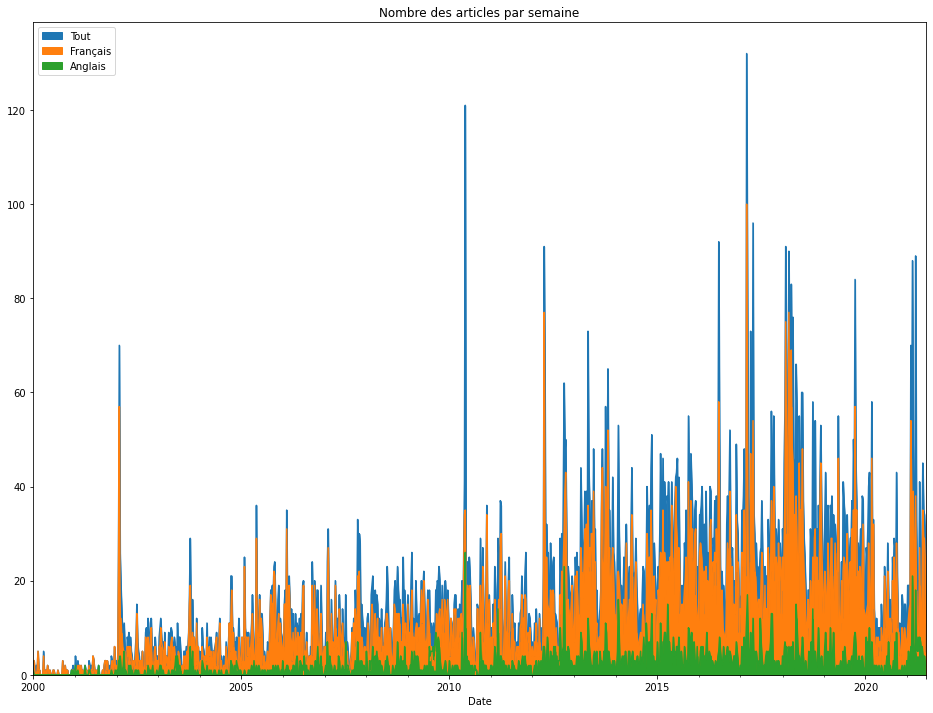

In [19]:
fig, ax = plt.subplots()
weekly_cp = cp_sort.resample('W').size()
weekly_cp.plot.area(figsize=(16,12), title='Nombre des articles par semaine',label='Tout')

cp_fr = cp_sort[cp_sort['Language']=='fr']
weekly_cpfr = cp_fr.resample('W').size()
weekly_cpfr.plot.area(figsize=(16,12), title='Nombre des articles par semaine',label='Français')

cp_en = cp_sort[cp_sort['Language']=='en']
weekly_cpen = cp_en.resample('W').size()
weekly_cpen.plot.area(figsize=(16,12), title='Nombre des articles par semaine',label='Anglais')

plt.legend(loc=2)

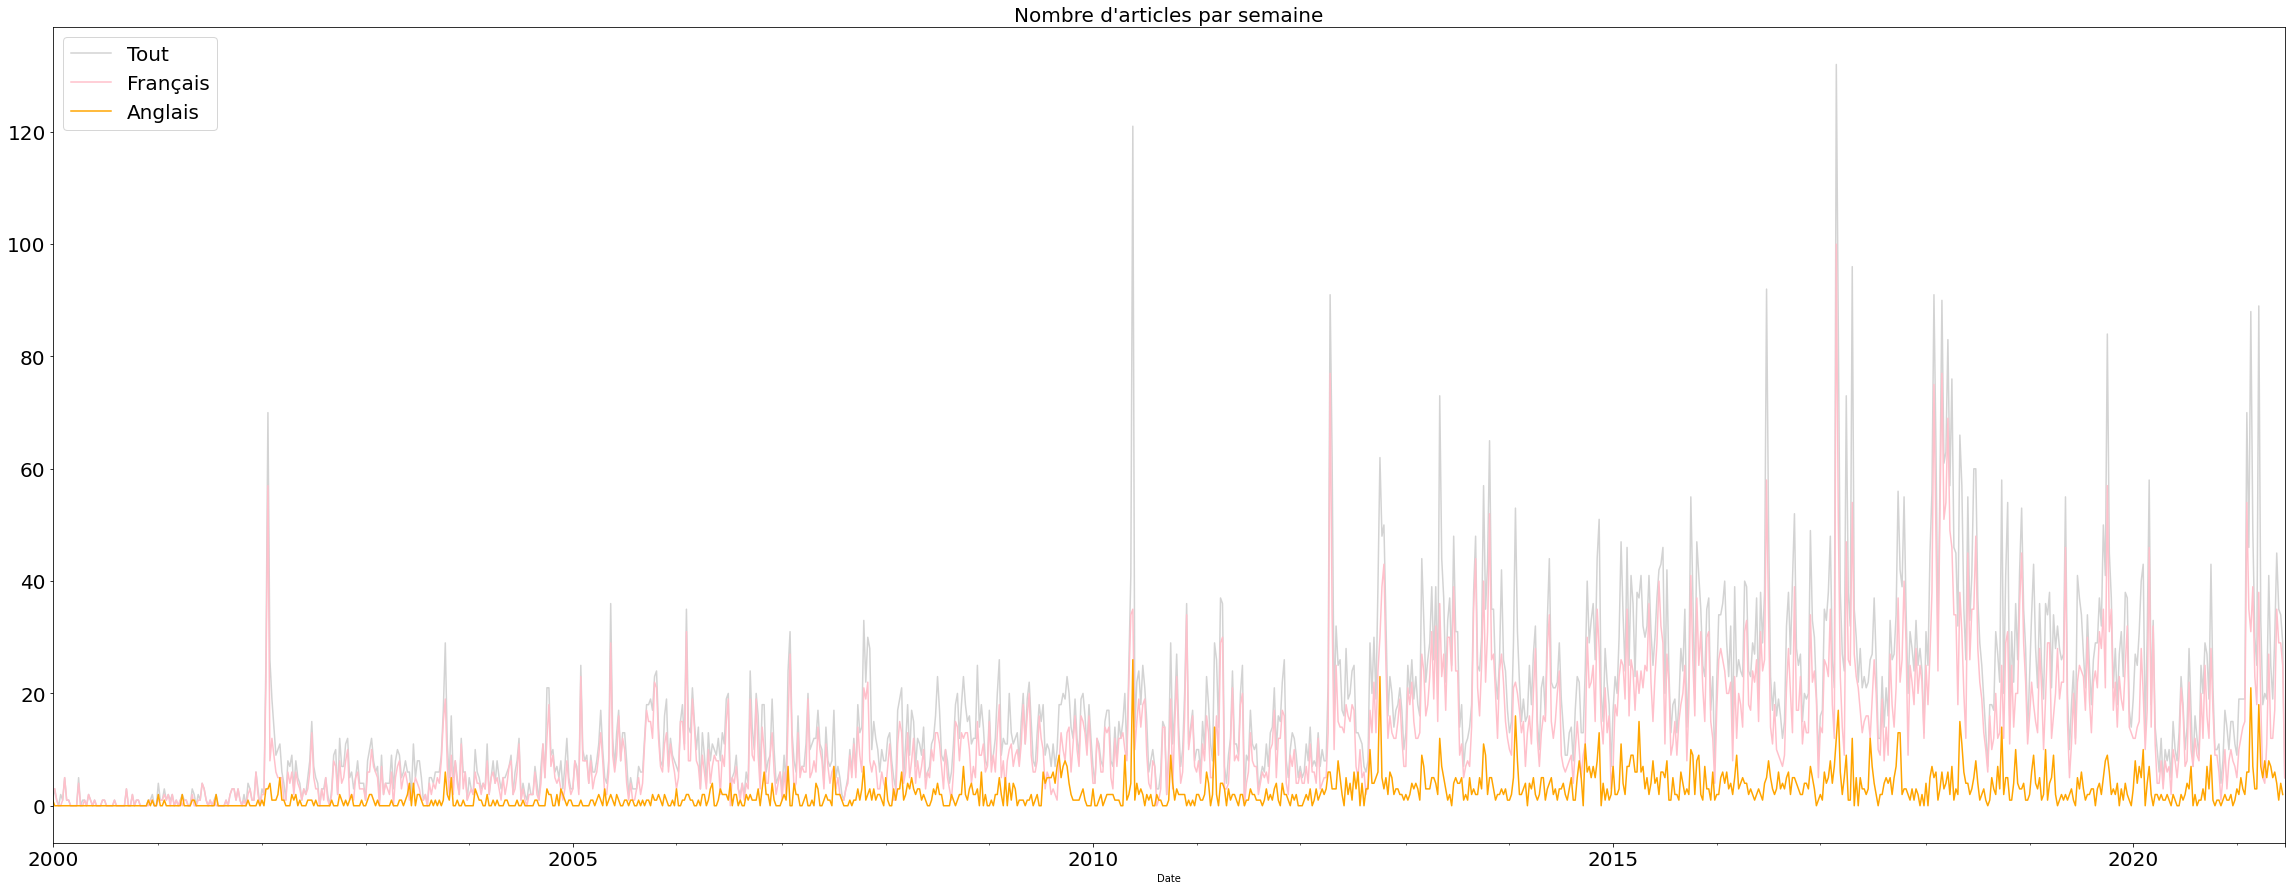

In [32]:

ly_cp = cp_sort.resample('w').size()
fig = ly_cp.plot(figsize=(40,15), title='Nombre d\'articles par semaine', c='lightgrey',
               label='Tout',fontsize=20)

cp_fr = cp_sort[cp_sort['Language']=='fr']
ly_cpfr = cp_fr.resample('w').size()
ly_cpfr.plot(figsize=(40,15), title='Nombre d\'articles par semaine', c='pink',
                 label='Français',fontsize=20)
#plt.scatter(ly_cpfr.index, ly_cpfr, c='pink',label='Français')

cp_en = cp_sort[cp_sort['Language']=='en']
ly_cpen = cp_en.resample('w').size()
ly_cpen.plot(figsize=(40,15), title='Nombre d\'articles par semaine', c='orange',
                 label='Anglais',fontsize=20)
#plt.scatter(ly_cpen.index, ly_cpen, c='orange',label='Anglais')


plt.legend(loc=2,fontsize=20)
fig.axes.title.set_size(20)



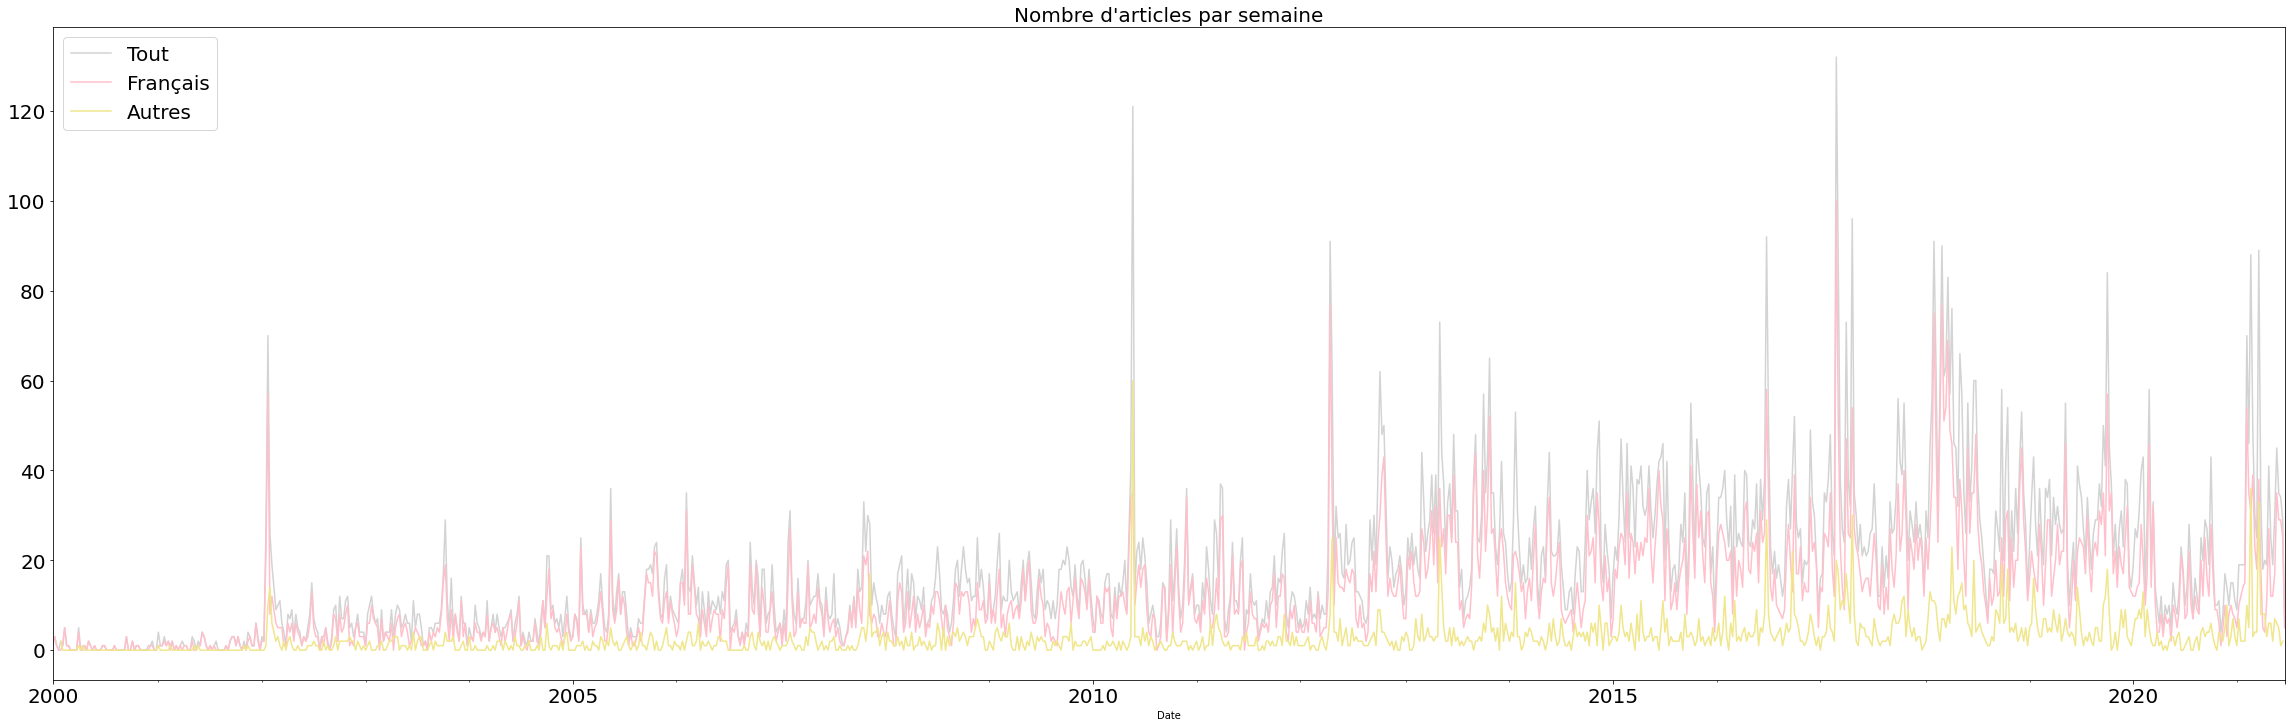

In [29]:
import matplotlib.pyplot as plt

ly_cp = cp_sort.resample('w').size()
fig = ly_cp.plot(figsize=(40,12), title='Nombre d\'articles par trimestre', fontsize=20,c='lightgrey',label='Tout')

cp_fr = cp_sort[cp_sort['Language']=='fr']
ly_cpfr = cp_fr.resample('w').size()
ly_cpfr.plot(figsize=(40,12), title='Nombre d\'articles par trimestre', c='pink',
                 label='Français',fontsize=20)
#plt.scatter(ly_cpfr.index, ly_cpfr, c='pink',label='Français')

cp_others = cp_sort[(cp_sort['Language']!='fr')&(cp_sort['Language']!='en')]
ly_cpothers = cp_others.resample('w').size()
ly_cpothers.plot(figsize=(40,12), title='Nombre d\'articles par semaine',fontsize=20, c='khaki',label='Autres')
#plt.scatter(ly_cpothers.index, ly_cpothers, c='khaki',label='Autres Langues')

plt.legend(loc=2,fontsize=20)
fig.axes.title.set_size(20)
plt.show()

In [390]:
weekly_cpothers

Date
2000-03-31      2
2000-06-30      2
2000-09-30      0
2000-12-31      0
2001-03-31      2
             ... 
2020-06-30     20
2020-09-30     31
2020-12-31     49
2021-03-31    119
2021-06-30     51
Freq: Q-DEC, Length: 86, dtype: int64

In [391]:
cp_fr.to_csv('corpus_fr.csv', index=1, header=True)
cp_fr

,Journal,Author,Title,Content,Language
Date,,,,,
2000-01-06,Le Figaro,VIRGINIE MOUZAT,"Chic, le luxe revient",Y a-t-il un lien entre le fait que la société ...,fr
2000-01-08,l'Humanité,"GUÉHENNEUX, LISE; WIDEMANN, DOMINIQUE","Pendant la polémique, l'art contemporain continue","Vue de l'étranger, la polémique sur l'art cont...",fr
2000-01-08,l'Humanité,NaN,Peintre,"J'ai joint ma signature, au mois de juin derni...",fr
2000-01-12,Le Figaro,"FRANÇOISE DE MAULDE, CAROLINE GAUDE, CAROLINE ...",Quoi de neuf aux musées,"Nouveautés, rénovations, déménagements De la n...",fr
2000-02-03,L'Express,GANDILLOT THIERRY; LIBAN LAURENCE,Catherine Trautmann C'est le ministre qui décide,Le ministère de la Culture traverse une zone d...,fr
...,...,...,...,...,...
2021-06-14,Libération,LIBERATION,Les rues d'Israël fêtent le départ de Nétanyah...,Les rues d'Israël fêtent le départ de Nétanyah...,fr
2021-06-14,Libération,JUDICAËL LAVRADOR,ANNE IMHOF au bonheur dédale,e premier geste d'Anne Imhof L aura été de...,fr
2021-06-15,Le Figaro,"BOSIO, ALICE, DE SAINT PHALLE, HUGO",Six nouvelles terrasses gourmandes pour profit...,LA PLUS DOLCE VITA: BAMBINI CARTE: 25-60 €. ...,fr


In [392]:
cp_en.to_csv('corpus_en.csv', index=1, header=True)
cp_en

,Journal,Author,Title,Content,Language
Date,,,,,
2000-01-01,NaN,MIRIAM ROSEN,Palais Coup(Brief Article),The idea of such a center--on the model of Lon...,en
2000-11-28,NaN,NaN,Quest for 'Home' in Globalized World,"Titled, My Home is Yours, Your Home is Mine, t...",en
2000-12-13,NaN,NaN,"Artist's Reflection on Personal, Interpersonal...",Twelve artists from seven countries in Asia an...,en
2001-01-05,NaN,NaN,Calendar Asia's Guide To Leisure & Arts Activi...,"You Give Us 97 Minutes, We'll Give You the Bar...",en
2001-01-06,International Herald Tribune,JONATHAN NAPACK CR INTERNATIONAL HERALD TRIBUNE,Biennials Shake Up Asian Scene,"I'm not interested in ideological purity, Sans...",en
...,...,...,...,...,...
2021-06-02,The New York Times,COCO ROMACK,Anne Imhof’s Unnerving Hall of Mirrors,While in Italy last year to install her multim...,en
2021-06-04,Fairchild Publishing LLC,MIMOSA SPENCER,Paris Fashion Week to Get New Tools to Improve...,"“We have a duty to provide global leadership,”...",en
2021-06-05,Telegraph Media Group Ltd.,SEB EMINA,Inside the $194m private art museum that cemen...,Tickets are completely sold out until the firs...,en


In [393]:
cp_others.to_csv('corpus_others.csv', index=1, header=True)
cp_others

,Journal,Author,Title,Content,Language
Date,,,,,
2000-01-26,NaN,NaN,Современное искусство увековечили,Второе рождение центра сопровождалось серией в...,ru
2000-01-29,NaN,NaN,Vom eigenen Zugriff auf die Welt,"Als Kelly 1948 von Boston nach Paris kam, war ...",de
2000-04-01,NaN,VON RÉGIS DEBRAY,"Das Museum, Fenster zur Welt!",NACH monatelangen Renovierungsarbeiten hat das...,de
2000-04-12,NaN,NaN,Katharina II,Noch vor kurzem hatte sie das Jahr 2001 zur «a...,de
2001-01-06,NaN,VON AUSWÄRTIGE AUTOREN,Local News,"«Ich fahre morgen nach Gstaad», teilt Jungdesi...",de
...,...,...,...,...,...
2021-05-25,Verlag der Frankfurter Rundschau GmbH,NaN,NACHRICHTEN CR FR Deutschlandausgabe,Anne Imhof bespielt riesige Pariser Kunsthalle...,de
2021-05-27,Cronachedellacampania.it,NaN,"Another Green World, la grande mostra en plein...",La mostra en plein air realizzata nella Villa ...,it
2021-06-01,GEDI Gruppo Editoriale SPA,CRISTIANA CAMPANINI,Le geometrie pittoriche di Du Pasquier,"Semplici presenze, geometrie e solidi colorati...",it
